# ANALISI DATI ESERCIZIO 4

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'font.size': 18})

In [57]:
sum_prog= np.loadtxt("Esercizio4_1/Equilibration/output_ekin.dat")
sum_prog2= np.loadtxt("Esercizio4_1/Equilibration/output_epot.dat")
sum_prog3= np.loadtxt("Esercizio4_1/Equilibration/output_etot.dat")
sum_prog4= np.loadtxt("Esercizio4_1/Equilibration/output_temp.dat")

## Esercizio 4.1

In questo primo esercizio ho modificato il codice di dinamica molecolare per equilibrare il sistema. Per fare ciò ho aggiunto la possitbilità al codice di riscalare le velocità per ottenere la temperatura desiderata e la possibilità di utilizzare le posizioni della simulazione precedente come nuovi punti di partenza. L'algoritmo di Verlet utilizza sempre la posizione precedente per muovere le particelle, perciò utilizzando le posizioni finali della simulazione precedente permette di ripartire da un punto più vicino all'equilibrio. Nel mio codice ho fatto girare una prima simulazione con posizioni inzialo generate in maniera causale e con le velocità riscalata per ottenere la temperatura desiderata. Dopo di che eseguo una nuova simulazione utiizzando le posizioni finali come nuove posizioni di partenza e le velocità riscalate. Ripeto questo processo per un totale di 3 simulazioni e $15000$ passi per arrivare all'equilibrio

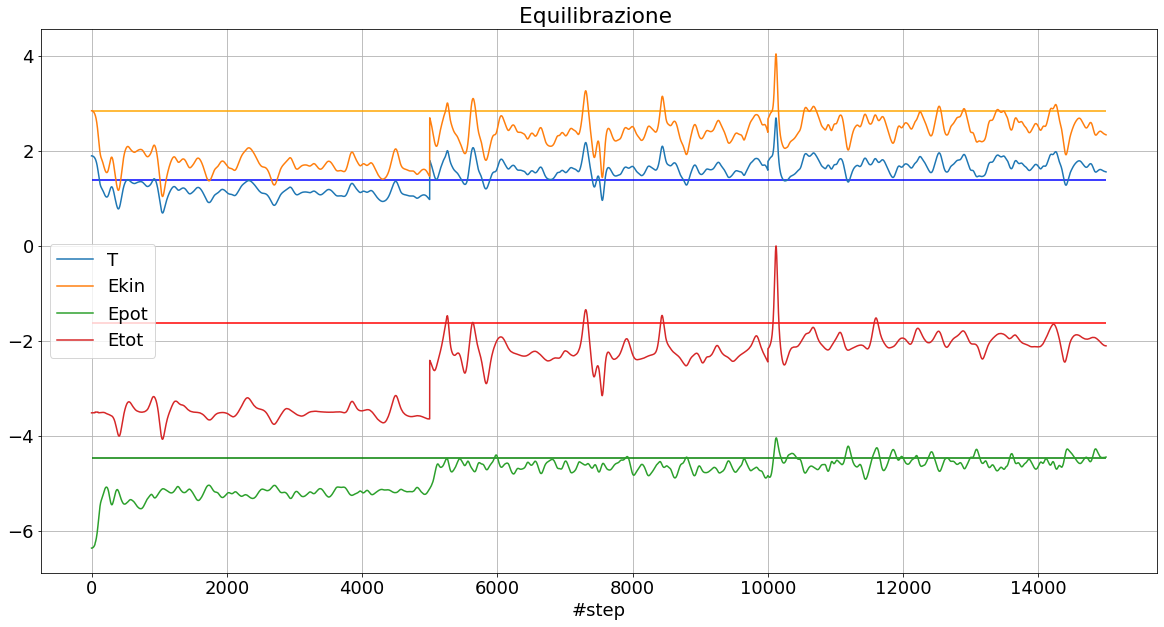

In [59]:
dim=len(sum_prog)
x = np.arange(dim)
plt.figure(figsize=(20,10));
plt.plot(x,sum_prog4[:dim],label="T")
plt.plot(x,sum_prog[:dim],label="Ekin")
plt.plot(x,sum_prog2[:dim],label="Epot")
plt.plot(x,sum_prog3[:dim],label="Etot")
plt.hlines(1.4,0,dim,color='blue')
plt.hlines(2.85, 0, dim,color='orange')
plt.hlines(-4.47559, 0,dim,color='green')
plt.hlines(-1.62559, 0, dim,color='red')
plt.xlabel('#step')
plt.title("Equilibrazione ")
plt.legend()
plt.grid(True)
plt.show()

In questo grafico mostro come le grandezze prese in esame siano tutte equilibrate, le rette orizzontali rappresentano i questo caso i valori teorici.

## Esercizio 4.2

Dopo aver ottenuto un sistema equilibrato posso cominciare con misurare le grandezze selezionate: energia potenziale, energia cinetica  energia totale ed temperatura. Ho fatto $M=5x10^4$ simulazioni ed ho utilizzato la media a blocchi con $N=50$.
Mostro i risultati sia per lo stato solido che per lo stato liquido che hanno le seguenti caratteristiche.

Fase solida: $\rho^\star = 1.1$, $T^\star = 1.4$ (cut-off radius: $r_c = 2.2$)
 
Fase liquida: $\rho^\star = 0.8$, $T^\star = 1.9$ (cut-off radius: $r_c = 2.5$)
 
I risultati in questo caso sonon presentati in unità di Lennard Jones

### Stato Solido

In [60]:
ave_kin= np.loadtxt("Esercizio4_1/Solid_result/ave_ekin.out")
ave_pot= np.loadtxt("Esercizio4_1/Solid_result/ave_epot.out")
ave_tot= np.loadtxt("Esercizio4_1/Solid_result/ave_etot.out")
ave_temp= np.loadtxt("Esercizio4_1/Solid_result/ave_temp.out")

<function matplotlib.pyplot.show(close=None, block=None)>

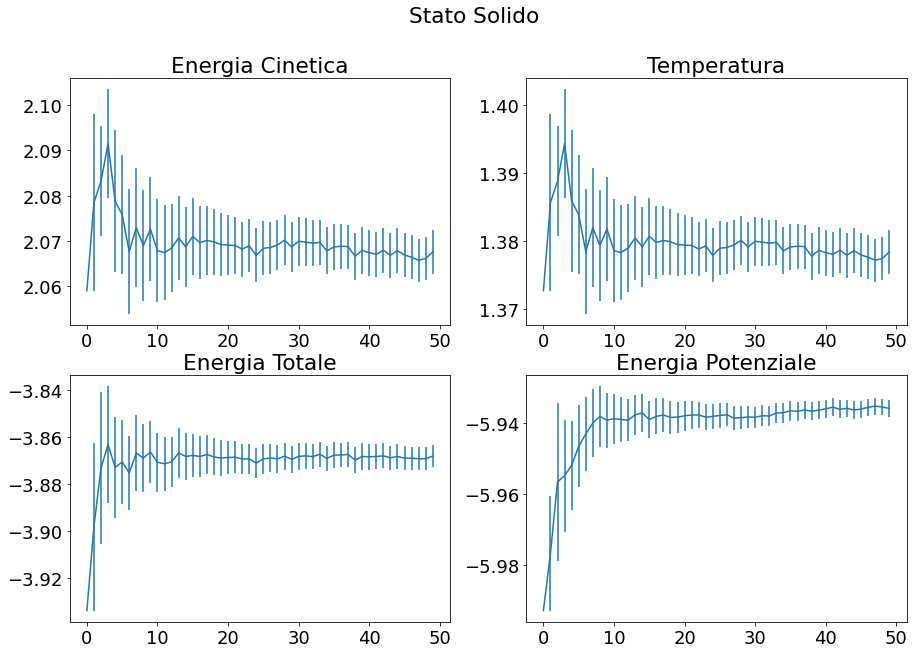

In [61]:
x = np.arange(len(ave_kin))
fig, ax = plt.subplots(2,2,figsize=(15, 10))

ax[0,0].errorbar(x,ave_kin[:,2],yerr=ave_kin[:,3])
ax[0,1].errorbar(x,ave_temp[:,2],yerr=ave_temp[:,3])
ax[1,0].errorbar(x,ave_tot[:,2],yerr=ave_tot[:,3])
ax[1,1].errorbar(x,ave_pot[:,2],yerr=ave_pot[:,3])

fig.suptitle('Stato Solido')
ax[0,0].set_title('Energia Cinetica')
ax[0,1].set_title('Temperatura')
ax[1,0].set_title('Energia Totale')
ax[1,1].set_title('Energia Potenziale')

plt.show

### Stato liquido

In [62]:
ave_kin= np.loadtxt("Esercizio4_1/Liquid_result//ave_ekin.out")
ave_pot= np.loadtxt("Esercizio4_1/Liquid_result/ave_epot.out")
ave_tot= np.loadtxt("Esercizio4_1/Liquid_result/ave_etot.out")
ave_temp= np.loadtxt("Esercizio4_1/Liquid_result/ave_temp.out")

<function matplotlib.pyplot.show(close=None, block=None)>

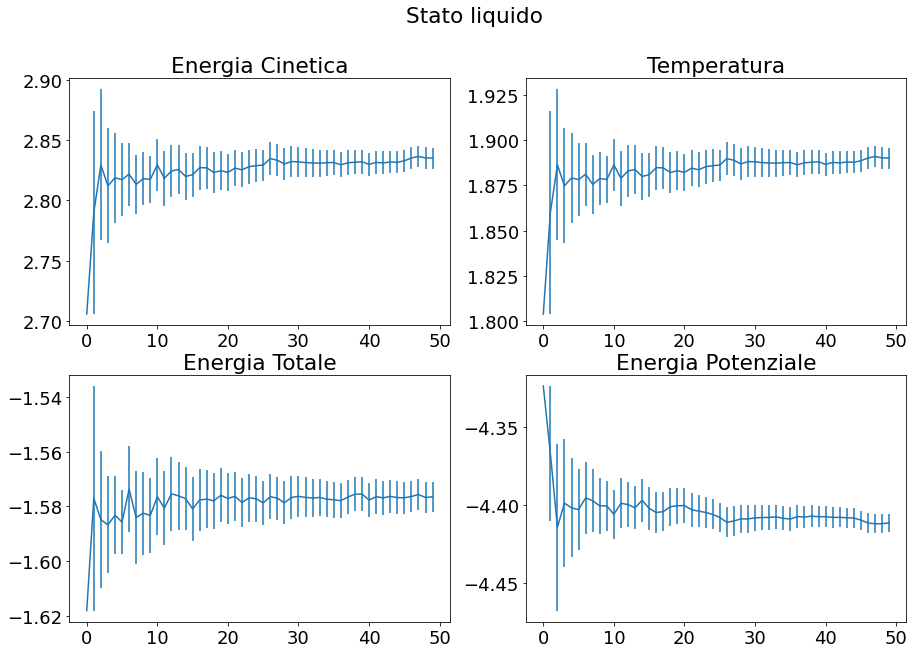

In [63]:
x = np.arange(len(ave_kin))
fig, ax = plt.subplots(2,2,figsize=(15, 10))

ax[0,0].errorbar(x,ave_kin[:,2],yerr=ave_kin[:,3])
ax[0,1].errorbar(x,ave_temp[:,2],yerr=ave_temp[:,3])
ax[1,0].errorbar(x,ave_tot[:,2],yerr=ave_tot[:,3])
ax[1,1].errorbar(x,ave_pot[:,2],yerr=ave_pot[:,3])

fig.suptitle('Stato liquido')
ax[0,0].set_title('Energia Cinetica')
ax[0,1].set_title('Temperatura')
ax[1,0].set_title('Energia Totale')
ax[1,1].set_title('Energia Potenziale')

plt.show

Nei grafici l'asse delle x rappresenta il numero di blocchi mentre l'asse delle y le diverse grandezze.

## Esercizio 4.3

In questo esercizio utilizzo il codice ottenuto negli esercizi precedenti e faccio una simulazione per l'argon nelle 3 diversi fasi.

Fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)

Fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)

Fase Gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In questo caso ho eseguito $M=10^5$ ed ho utilizzato una media a blocchi con $N=100$ e mostro i risulati in unità del sistema internazionale.

In [65]:
#parametri per l'argon
sigma = 0.34    
epsilon_boltzman = 120  #e/kB
k_boltzman=1.38064852*1E-23
epsilon=epsilon_boltzman*k_boltzman
sigma_si=sigma*1E-9
mass = 39.948*1.66054*1E-27


### Argon liquido

In [66]:
ave_kin= np.loadtxt("Esercizio4_3/Liquid_result/ave_ekin.out")
ave_pot= np.loadtxt("Esercizio4_3/Liquid_result/ave_epot.out")
ave_tot= np.loadtxt("Esercizio4_3/Liquid_result/ave_etot.out")
ave_temp= np.loadtxt("Esercizio4_3/Liquid_result/ave_temp.out")

<function matplotlib.pyplot.show(close=None, block=None)>

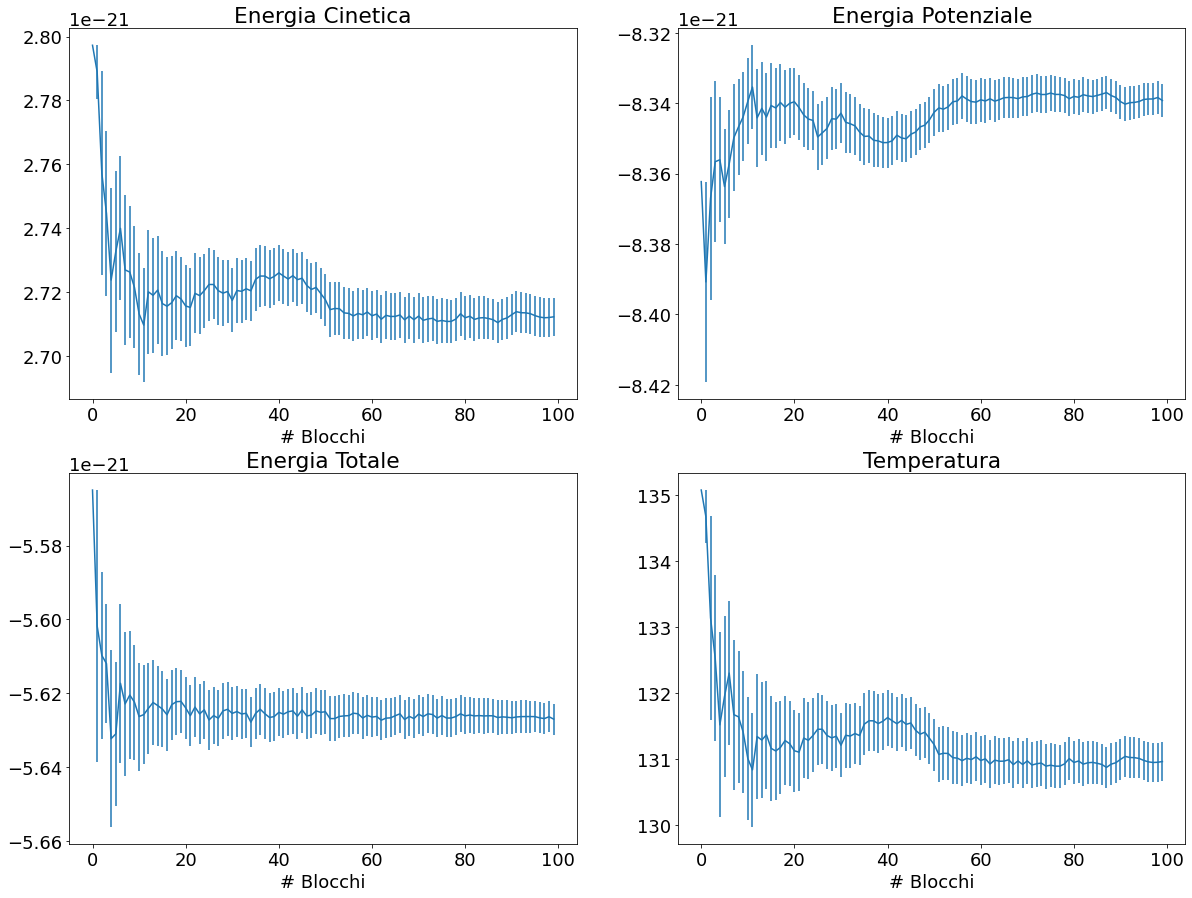

In [67]:
x = np.arange(len(ave_kin))
fig, ax = plt.subplots(2,2,figsize=(20, 15))

ax[0,0].errorbar(x,ave_kin[:,2]*epsilon,yerr=ave_kin[:,3]*epsilon)
ax[0,1].errorbar(x,ave_pot[:,2]*epsilon,yerr=ave_pot[:,3]*epsilon)
ax[1,0].errorbar(x,ave_tot[:,2]*epsilon,yerr=ave_tot[:,3]*epsilon)
ax[1,1].errorbar(x,ave_temp[:,2]*epsilon_boltzman,yerr=ave_temp[:,3]*epsilon_boltzman)
ax[0,0].set_xlabel("# Blocchi")
ax[0,1].set_xlabel("# Blocchi")
ax[1,0].set_xlabel("# Blocchi")
ax[1,1].set_xlabel("# Blocchi")

ax[0,0].set_title('Energia Cinetica')
ax[0,1].set_title('Energia Potenziale')
ax[1,0].set_title('Energia Totale')
ax[1,1].set_title('Temperatura')

plt.show

### Argon solido

In [68]:
ave_kin= np.loadtxt("Esercizio4_3/Solid_result/ave_ekin.out")
ave_pot= np.loadtxt("Esercizio4_3/Solid_result/ave_epot.out")
ave_tot= np.loadtxt("Esercizio4_3/Solid_result/ave_etot.out")
ave_temp= np.loadtxt("Esercizio4_3/Solid_result/ave_temp.out")

<function matplotlib.pyplot.show(close=None, block=None)>

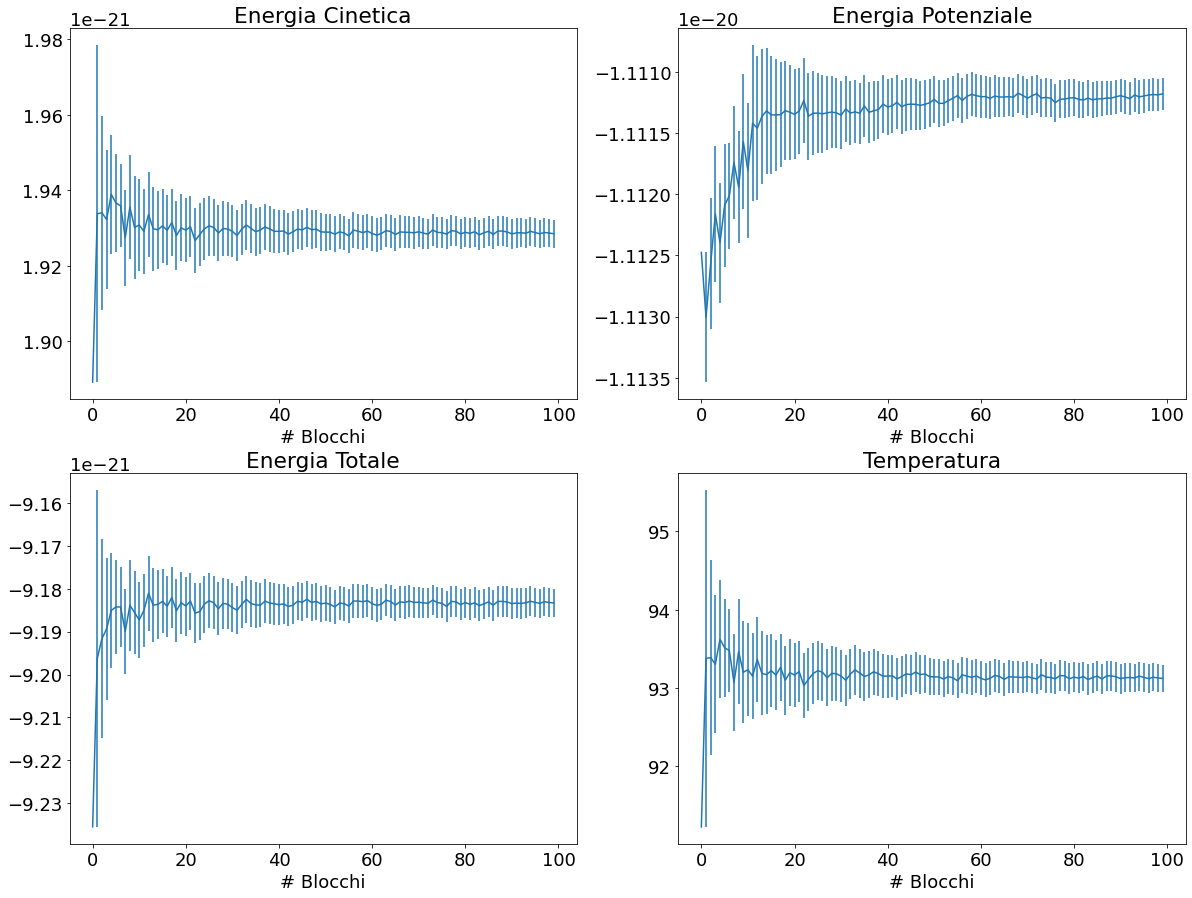

In [69]:
x = np.arange(len(ave_kin))
fig, ax = plt.subplots(2,2,figsize=(20, 15))

ax[0,0].errorbar(x,ave_kin[:,2]*epsilon,yerr=ave_kin[:,3]*epsilon)
ax[0,1].errorbar(x,ave_pot[:,2]*epsilon,yerr=ave_pot[:,3]*epsilon)
ax[1,0].errorbar(x,ave_tot[:,2]*epsilon,yerr=ave_tot[:,3]*epsilon)
ax[1,1].errorbar(x,ave_temp[:,2]*epsilon_boltzman,yerr=ave_temp[:,3]*epsilon_boltzman)
ax[0,0].set_xlabel("# Blocchi")
ax[0,1].set_xlabel("# Blocchi")
ax[1,0].set_xlabel("# Blocchi")
ax[1,1].set_xlabel("# Blocchi")

ax[0,0].set_title('Energia Cinetica')
ax[0,1].set_title('Energia Potenziale')
ax[1,0].set_title('Energia Totale')
ax[1,1].set_title('Temperatura')

plt.show

### Argon gassoso

In [70]:
ave_kin= np.loadtxt("Esercizio4_3/Gas_result/ave_ekin.out")
ave_pot= np.loadtxt("Esercizio4_3/Gas_result/ave_epot.out")
ave_tot= np.loadtxt("Esercizio4_3/Gas_result/ave_etot.out")
ave_temp= np.loadtxt("Esercizio4_3/Gas_result/ave_temp.out")

<function matplotlib.pyplot.show(close=None, block=None)>

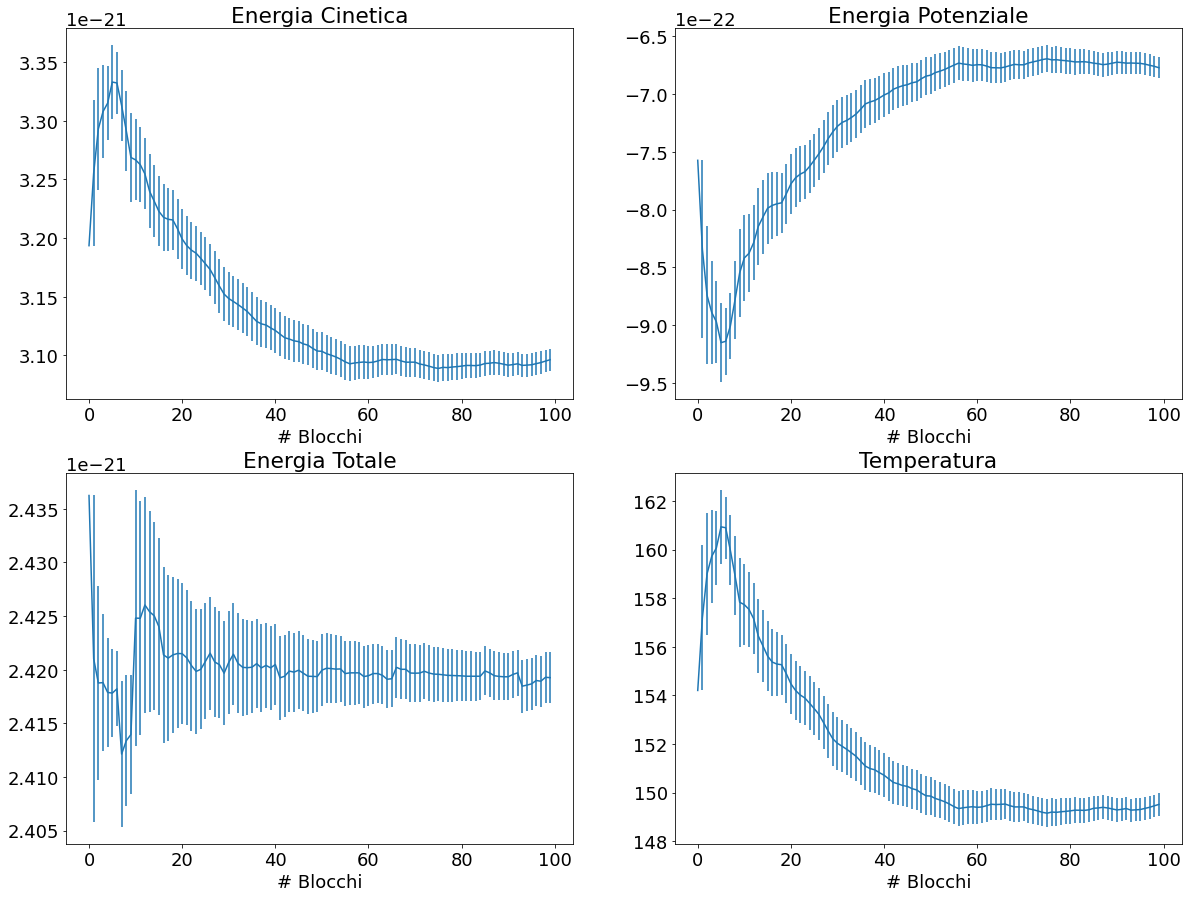

In [71]:
x = np.arange(len(ave_kin))
fig, ax = plt.subplots(2,2,figsize=(20, 15))

ax[0,0].errorbar(x,ave_kin[:,2]*epsilon,yerr=ave_kin[:,3]*epsilon)
ax[0,1].errorbar(x,ave_pot[:,2]*epsilon,yerr=ave_pot[:,3]*epsilon)
ax[1,0].errorbar(x,ave_tot[:,2]*epsilon,yerr=ave_tot[:,3]*epsilon)
ax[1,1].errorbar(x,ave_temp[:,2]*epsilon_boltzman,yerr=ave_temp[:,3]*epsilon_boltzman)
ax[0,0].set_xlabel("# Blocchi")
ax[0,1].set_xlabel("# Blocchi")
ax[1,0].set_xlabel("# Blocchi")
ax[1,1].set_xlabel("# Blocchi")

ax[0,0].set_title('Energia Cinetica')
ax[0,1].set_title('Energia Potenziale')
ax[1,0].set_title('Energia Totale')
ax[1,1].set_title('Temperatura')

plt.show

I risultati della simulazione sono soddisfacenti per la fase liquida e per la fase solida, sono riuscito ad equilibrare il sistema e fare delle misurazioni. Per la fase gassosa invece l'equilibrio ha richiesto molto più cicli iniziali rispetto ai 3 delle altre due fasi. I risulati di quest'ultima fase non sono ottimi.